<a href="https://colab.research.google.com/github/ksvetova/facerecogniton/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install faiss-gpu
!pip install git+https://github.com/elliottzheng/face-detection.git@master
!pip install scikit-image
!git clone --recursive https://github.com/kiselev1189/insightface-just-works.git
 
 #Связь с файловой системой
from google.colab import drive
drive.mount('/content/gdrive') 

!pip install -r '/content/gdrive/My Drive/project/requests.txt'

  Cloning https://github.com/elliottzheng/face-detection.git (to revision master) to /tmp/pip-req-build-ditgjdpl
  Running command git clone -q https://github.com/elliottzheng/face-detection.git /tmp/pip-req-build-ditgjdpl
  Created wheel for face-detection: filename=face_detection-1.0.5-cp36-none-any.whl size=1638316 sha256=c4f3abcbf1cfa765ed2a64a1552cbdc8870db7c7d48d54d8e7165a34deaf91a3
  Stored in directory: /tmp/pip-ephem-wheel-cache-hmpclrap/wheels/cd/7a/dd/9edb7a7cfd7b07125bc2acca8f4619292cd6caa5458ed5f6f7
Successfully built face-detection
fatal: destination path 'insightface-just-works' already exists and is not an empty directory.
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
  Using cached https://files.pythonhosted.org/packages/d2/ab/43e678759326f728de861edbef34b8e2ad1b1490505f20e0d1f0716c3bf4/numpy-1.17.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages

In [54]:
import sys
sys.path.insert(0,'/content/gdrive/My Drive/project')
!pip install mxnet
import os
import datetime
import os.path
import PIL
from PIL import Image
import cv2
import numpy as np
from numpy.linalg import norm
import faiss
from insightface.embedder import InsightfaceEmbedder
from skimage import io
from face_detection import RetinaFace
import matplotlib.pyplot as plt

model_path = "/content/gdrive/My Drive/project/model-r100-ii/model"
embedder = InsightfaceEmbedder(model_path=model_path, epoch_num='0000', image_size=(112, 112))

loading /content/gdrive/My Drive/project/model-r100-ii/model 0


In [48]:
import time
import random
import os
import os.path
import PIL
from PIL import Image
import cv2
import numpy as np
from numpy.linalg import norm
import faiss
from insightface.embedder import InsightfaceEmbedder
from skimage import io
from face_detection import RetinaFace

start_time = time.time()

def similarity(emb1, emb2):
    return np.dot(emb1, emb2) / (norm(emb1) * norm(emb2))

def max_cos_sim(lst_p_emb, elem_gr_emb):
    m = similarity(lst_p_emb[0], elem_gr_emb)
    k = 0
    for i in range(len(lst_p_emb)):
        if similarity(lst_p_emb[i], elem_gr_emb) > m:
            m = similarity(lst_p_emb[i], elem_gr_emb)
            k = i
    return [m, k]

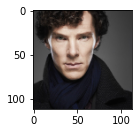

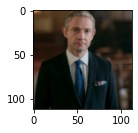

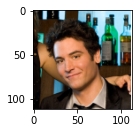

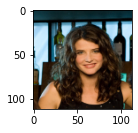

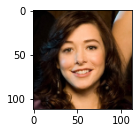

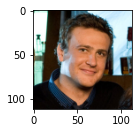

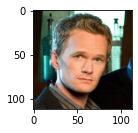

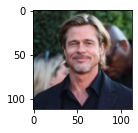

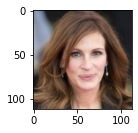

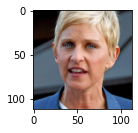

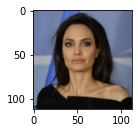

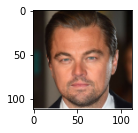

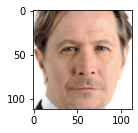

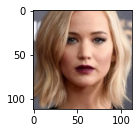

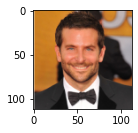

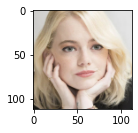

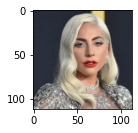

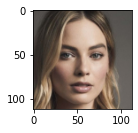

In [74]:
HERE = "/content/gdrive/My Drive/project/"
detector = RetinaFace()

portraits = os.listdir(os.path.join(HERE, 'port2/'))
portraits_embeddings = []
for i in range(len(portraits)):
    img = cv2.imread(os.path.join(HERE, 'port2/' + portraits[i]))
    face = detector(img)
    box, landmarks, score = face[0]
    x, y, w, h = box
    sub_face = img[int(y):int(h), int(x):int(w)]
    fig = plt.figure()
    a=fig.add_subplot(1, 3, 1)
    plt.imshow(img[:,:, ::-1])
    portraits_embeddings.append(embedder.embed_image(sub_face))


In [112]:
#создаем список определенных людей
file = open("visitlog.txt", "w")
file.write(str(now))
file.write("\n")


1

In [ ]:
group_images = []
extensions = ['jpg', 'jpeg', 'JPG', 'JPEG', 'tif', 'png']
for root, dirs, files in os.walk(HERE):
    for name in files:
        path = os.path.join(root, name)
        ext = path.split('.')[1]
        if ext in extensions:
            group_images.append(path)
group_images = group_images[22:]  # remove portraits and already signed
print('1 photo will be randomly chosen from {} photos'.format(len(group_images)))

In [113]:
# img = cv2.imread("/content/gdrive/My Drive/project/oskar/os1.jpg", cv2.IMREAD_COLOR)
EVENT="oskar"
file.write(EVENT +"\n")
photosFromEvent = os.listdir(os.path.join(HERE, EVENT))
# file.write(str(now)
for i in range(len(photosFromEvent)):
    ph=photosFromEvent[i]
    path_ph="/content/gdrive/My Drive/project/oskar/"+ph
    img = cv2.imread(path_ph, cv2.IMREAD_COLOR)
    img_with_text = img.copy()
    autors = 0
    faces = detector(img)
    N = int(len(faces))
    c_embeddings = []

    for j in range(int(len(faces))):
        box, landmarks, score = faces[j]
        x, y, w, h = box
        sub_face = img[int(y):int(h), int(x):int(w)]
        try:
            c_embeddings.append(embedder.embed_image(sub_face))
        except Exception:
            N = N - 1

    for z in range(N):
        box, landmarks, score = faces[z]
        x, y, w, h = box

        res = max_cos_sim(portraits_embeddings, c_embeddings[z])

        if res[0] > 0.5:
            autors += 1
            name = portraits[res[1]].split('.')[0]
            name = name[0].upper() + name[1:].lower()
            font = cv2.FONT_HERSHEY_SIMPLEX
          
            file.write(name + "  вероятность:" + str(res[0]) + '\n')
            print(name + '\n' + str(res[0]) + '\n')
            print('coordinates: ', [int(x), int(y), int(w), int(h)])
            img_with_text = cv2.putText(img, name, (int(x), int(y)), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.rectangle(img_with_text, (int(x), int(y)), (int(w), int(h)), (255, 255, 0), 2)
            cv2.imwrite(path, img_with_text)
        
        else:
          print('No one from our data is on the photo')
    path = os.path.join(HERE, 'randomimage_{}.jpg'.format(i))

# cv2.imwrite(path, img_with_text)
# print('{} randomly chosen from 3775 photo is analyzed'.format(i))
print("{} seconds are passed".format(time.time() - start_time))
file.close()

Wat
0.64116186

coordinates:  [420, 136, 518, 267]
No one from our data is on the photo
Sher
0.77633333

coordinates:  [610, 47, 711, 191]
No one from our data is on the photo
Bradley
0.6605108

coordinates:  [311, 88, 394, 206]
Gaga
0.5402559

coordinates:  [622, 121, 696, 225]
Margot
0.65239054

coordinates:  [291, 143, 368, 249]
No one from our data is on the photo
No one from our data is on the photo
Emma
0.62031335

coordinates:  [239, 65, 281, 116]
No one from our data is on the photo
No one from our data is on the photo
No one from our data is on the photo
Gary
0.57102585

coordinates:  [436, 50, 483, 110]
No one from our data is on the photo
No one from our data is on the photo
Brad
0.7769792

coordinates:  [520, 32, 585, 116]
No one from our data is on the photo
No one from our data is on the photo
Ellen
0.6058212

coordinates:  [305, 96, 350, 152]
Leo
0.8852694

coordinates:  [215, 23, 274, 98]
No one from our data is on the photo
Ted
0.70199305

coordinates:  [160, 140, 212,